In [1]:
import os, importlib, sys, time, h5py, itertools

In [2]:
import numpy as np
from scipy import io, linalg, stats, ndimage, signal
from scipy.sparse import diags

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as cb

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':12})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino'], 'size':12})
# rc('text', usetex=False)

In [5]:
import ladyns as ldn

# load data

In [6]:
dims = [25, 25]
num_rtime = 500
num_trial = 1000

In [7]:
data_mat = io.loadmat('data_simulation_11.mat')

In [8]:
data = [data_mat['data_0'], data_mat['data_1']]

In [9]:
rec_time = [0, 500]
num_time = data[0].shape[0]

# load true

In [10]:
result_true = np.load('result_true_omega_18Hz.npz')

In [11]:
Sigma_true = np.mean(result_true["Sigmas_true"], 0)

# load DLAG result

In [12]:
result_DLAG = io.loadmat('result_simulation_11_DLAG_single.mat')

In [13]:
latent_DLAG = result_DLAG['latent_DLAG']

In [14]:
Sigma_DLAG = np.array([
    np.cov(latent_DLAG[i])
    for i in np.arange(latent_DLAG.shape[0])
])

Text(0, 0.5, 'Magnitude of Covariance')

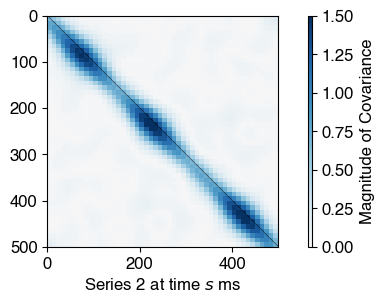

In [23]:
fig = plt.figure(figsize=(4,3))
im = ldn.imshow(np.abs(Sigma_DLAG[0][:num_time,num_time:]), 
                time=rec_time, identity=True, 
                vmax=1.5, cmap='RdBu')
plt.xlabel(r"Series 2 at time $s$ ms")
    
axes[0].set_ylabel(r"Series 1 at time $t$ ms")

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.9, 0.11, 0.01, 0.77])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylim(0, 1.5)
cbar.ax.set_ylabel("Magnitude of Covariance")

# load GPFA result

In [24]:
result_GPFA = io.loadmat('result_simulation_11_GPFA_single.mat')

In [25]:
latent_0 = result_GPFA['latent_0']
latent_1 = result_GPFA['latent_1']

In [26]:
latent = np.concatenate([latent_0, latent_1], 1)

In [27]:
latent.shape

(1, 100, 1000)

In [29]:
Sigma_GPFA = np.cov(
    latent.reshape((2*num_time, -1))
).reshape((1,2*num_time,1,2*num_time)).transpose([0,2,1,3])

Text(0, 0.5, 'Magnitude of Covariance')

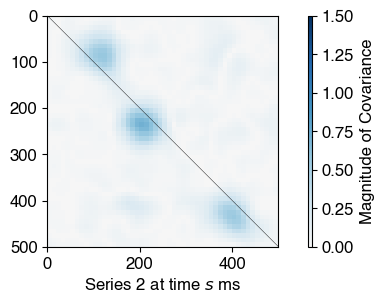

In [30]:
fig = plt.figure(figsize=(4,3))
im = ldn.imshow(np.abs(Sigma_GPFA[0,0][:num_time,num_time:]), 
                time=rec_time, identity=True, 
                vmax=1.5, cmap='RdBu')
plt.xlabel(r"Series 2 at time $s$ ms")
    
axes[0].set_ylabel(r"Series 1 at time $t$ ms")

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.9, 0.11, 0.01, 0.77])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylim(0, 1.5)
cbar.ax.set_ylabel("Magnitude of Covariance")